In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Create new default settings for ALL figures

In [261]:
%%capture

# Send gridlines to back (behind the graphical elements)
plt.rc('axes', axisbelow=True)

# Set figure size
plt.rc('figure', figsize=(10, 5))

# Set gridlines and ticks
plt.rc('axes', grid=True)
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)

#----------------------------------------------------
# I've yet to find a way to set and customise default MINOR and MAJOR gridlines, and so I'll assign them throughout as:    

# plt.grid(which='minor', c='lightgrey')
# plt.grid(which='major', c='grey')
#----------------------------------------------------

# Import dataset

In [262]:
df1 = pd.read_csv('datasets/uber-raw-data-jul14.csv')
df1.tail()

,Date/Time,Lat,Lon,Base
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764
796120,7/31/2014 23:58:00,40.7199,-73.9884,B02764


# Convert datatime into pandas form - !! takes a few minutes !!

In [263]:
df1['Date/Time'] = df1['Date/Time'].map(pd.to_datetime) 
df1.head()

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512


# Add 3 columns for day of month, weekday and hour

In [264]:
# Create day of month column
def get_dom(dt):
    return dt.day

df1['dom'] = df1['Date/Time'].map(get_dom)


# Create weekday column
def get_weekday(dt):
    return dt.weekday()

df1['weekday'] = df1['Date/Time'].map(get_weekday)


# Create hour column
def get_hour(dt):
    return dt.hour

df1['hour'] = df1['Date/Time'].map(get_hour)


df1.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,1,0


# Plot day of month data as histogram

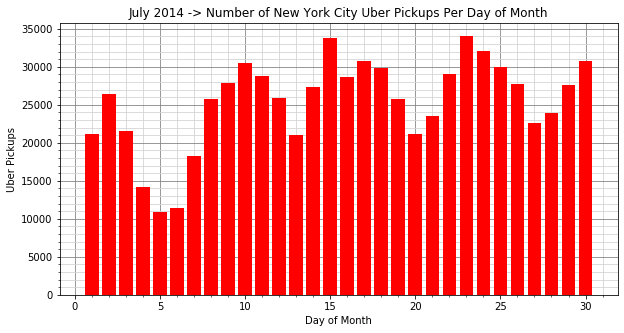

In [265]:
plt.hist(df1.dom, bins=30, rwidth=.8, range=(.5, 30.5), color='r')

plt.title('July 2014 -> Number of New York City Uber Pickups Per Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# From df1, sort day of month from least to most pickups

In [266]:
# Count number of rows
by_dom = df1.groupby('dom').apply(len)

by_dom_sorted = by_dom.sort_values()
by_dom_sorted


dom
5     10890
6     11443
4     14148
7     18280
13    21082
20    21212
1     21228
3     21597
27    22590
21    23578
28    23981
19    25726
8     25763
12    25936
2     26480
14    27350
29    27589
26    27708
9     27817
16    28607
11    28752
22    29029
18    29860
25    29975
10    30541
17    30710
30    30740
24    32050
31    33541
15    33845
23    34073
dtype: int64

# Plot data 'by_dom_sorted' as line graph

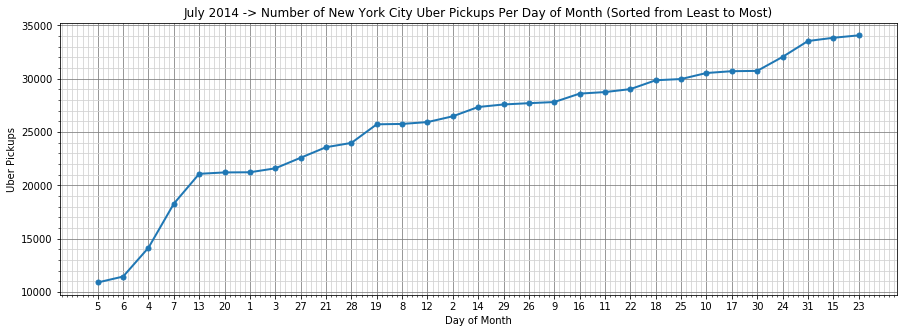

In [267]:
# Increase figure width to better view the x-axis
plt.figure(figsize=(15, 5))

plt.plot(range(0,31), by_dom_sorted, lw=2, marker='.', ms=10)
plt.xticks(range(0, 31), by_dom_sorted.index)

plt.title('July 2014 -> Number of New York City Uber Pickups Per Day of Month (Sorted from Least to Most)')
plt.xlabel('Day of Month')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot weekday data as histogram


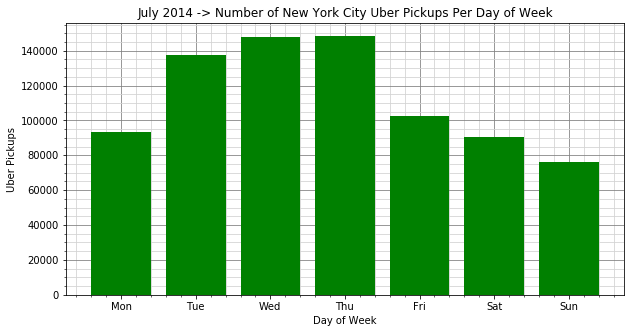

In [268]:
plt.hist(df1.weekday, bins=7, rwidth=.8, range=(-.5, 6.5), color='g')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

plt.title('July 2014 -> Number of New York City Uber Pickups Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Plot hour data as histogram (24hr axis => 5=5am, 20=8pm)

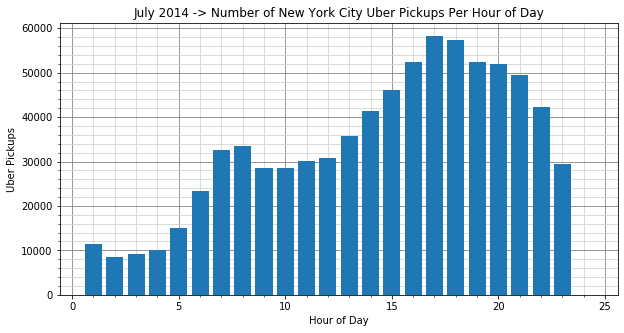

In [269]:
plt.hist(df1.hour, bins=24, rwidth=.8, range=(.5, 24.5))

plt.title('July 2014 -> Number of New York City Uber Pickups Per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Uber Pickups')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')

# Cross analysis (hour, day of week)

In [270]:
df2 = df1.groupby('weekday hour'.split()).apply(len).unstack()
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,1260,613,439,1019,1615,2461,3644,5066,4797,3692,...,4604,5057,6283,7328,6551,6378,6303,5640,3828,2266
1,1509,779,556,935,1483,2730,4811,6750,6662,5061,...,7551,7951,9219,11712,10992,9983,9781,8297,5806,3323
2,1773,966,780,1120,1630,2799,5017,7129,7125,5419,...,7229,8719,10421,11669,11739,10563,10491,9751,7275,4126
3,2150,1157,855,1283,1884,2931,4796,6709,6683,5385,...,7443,8654,9691,10485,11203,10848,10177,9545,8578,5756
4,2460,1541,1059,1230,1359,1989,2947,4032,4152,3631,...,5457,6031,6440,6657,6682,5947,5699,6654,7103,6077
5,4441,3153,2320,1704,1087,1097,1214,1594,2101,2668,...,4491,5079,5482,5483,5838,4913,5396,5901,6337,5600
6,4360,3318,2553,1908,982,925,1027,1265,1867,2630,...,4582,4562,4867,4926,4263,3700,4012,3740,3291,2198


# Plot df2 as heatmap

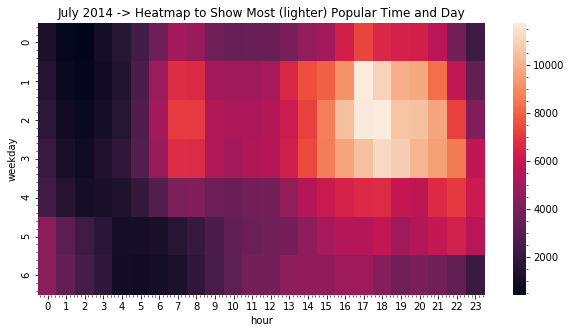

In [271]:
ax = sb.heatmap(df2)

ax.set_title("July 2014 -> Heatmap to Show Most (lighter) Popular Time and Day");

# Plot latitude and longitude data on same graph

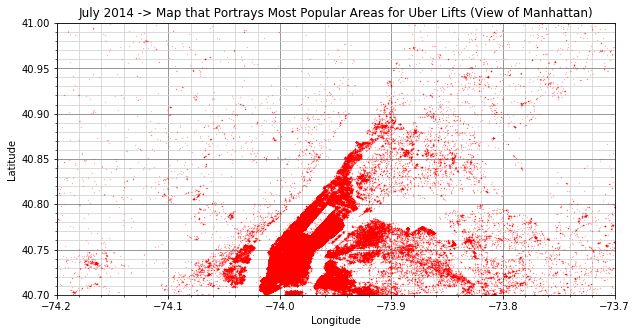

In [272]:
plt.plot(df1['Lon'], df1['Lat'], '.', ms=.5, alpha=.5, c='r')
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)

plt.title('July 2014 -> Map that Portrays Most Popular Areas for Uber Lifts (View of Manhattan)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(which='minor', c='lightgrey')
plt.grid(which='major', c='grey')